In [308]:
%matplotlib inline

import pickle
import math
import numpy as np
import pandas as pd

row_list = []

def angle(v1, v2):
    v1t = (v1[1][0]-v1[0][0], v1[1][1]-v1[0][1])
    v2t = (v2[1][0]-v2[0][0], v2[1][1]-v2[0][1])
#     print(v1)
# v1 is your firsr vector
# v2 is your second vector
    ang = abs(np.angle(v1t[0]+v1t[1]*1j, deg=True) - np.angle(v2t[0]+v2t[1]*1j, deg=True))
    if ang > 90:
        ang =  abs(ang - 180)
    if ang > 90:
        ang =  abs(ang - 180)
        
#     print(ang)
    return ang

def leng(v1, v2):
    v1t = (v1[1][0]-v1[0][0], v1[1][1]-v1[0][1])
    v2t = (v2[1][0]-v2[0][0], v2[1][1]-v2[0][1])
    len1 = math.sqrt((v1t[1]) ** 2 + (v1t[0]) ** 2)
    len2 = math.sqrt((v2t[1]) ** 2 + (v2t[0]) ** 2)
    deltalen = abs(len2-len1)/len1

    return deltalen
#     print(v1)
# v1 is your firsr vector
# v2 is your second vector
#     return np.angle(v1t[0]+v1t[1]*1j, deg=True) - np.angle(v2t[0]+v2t[1]*1j, deg=True) 

def calc_metric(filename, canvas):
    f = open(filename, "rb")
    filename = pickle.load(f)
    outfilename = pickle.load(f)
    anitype = pickle.load(f)
    tasktype = pickle.load(f)
    correct_answer = pickle.load(f)
    answer_segments = pickle.load(f)
    f.close()


    metrics = []
    sumdistance = 1
    sumangle = 1
    sumleng = 1
    answers_dict = {}
    total_answered = 0

    for answer_segment in answer_segments:
        if len(answer_segment) > 1:
            min_distance = 0.2*canvas
            bestfit = None
            segment_num = -1
            for answer_num,correct_segment in enumerate(correct_answer):
                dist0 = math.sqrt((correct_segment[0][0] - answer_segment[1][0]) ** 2 + (correct_segment[0][1] - answer_segment[1][1]) ** 2)
                dist1 = math.sqrt((correct_segment[1][0] - answer_segment[1][0]) ** 2 + (correct_segment[1][1] - answer_segment[1][1]) ** 2)
                #print distances to find the closest point to the end point
                dist = min(dist0, dist1)
                #print(dist)#, dist0, correct_segment[0][0] - answer_segment[1][0], correct_segment[0][1] - answer_segment[1][1], dist1, correct_segment[1][0] - answer_segment[1][0], (correct_segment[1][1] - answer_segment[1][1]))
                if dist < min_distance:
                    min_distance = dist
                    if dist == dist0:
                        bestfit = [correct_segment[1], correct_segment[0]]
                    else:
                        bestfit = correct_segment
                    segment_num = answer_num
            if bestfit :
                total_answered = total_answered + 1
                sumdistance *= min_distance
                angle_min = angle(answer_segment, bestfit)
    #             print(angle_min, answer_segment, bestfit)

                leng_min = leng(answer_segment, bestfit)            
                sumangle *= angle_min
                sumleng *= leng_min
                answers_dict[segment_num] = bestfit
                metrics.append([answer_segment, segment_num, bestfit, min_distance, angle_min, leng_min])


    numans = len(correct_answer)
    answered = len(answers_dict)
    
    if total_answered > 0 :
        sumdistance = sumdistance ** (1. / total_answered)
        sumangle = sumangle ** (1. / total_answered)
        sumleng = sumleng ** (1. / total_answered)
    # print("dict:", answers_dict)
    # print(metrics, "\n\n")
    
#     print("added segments", answered, "of", numans)
#     print("sum distance metric", sumdistance)
#     print("sum angle metric", sumangle)
#     print("sum length metric", sumleng)
    
    return anitype, answered, total_answered, numans, sumdistance, sumangle, sumleng


In [309]:
# calc_metric("Alex/10_3.out")
# calc_metric("Alex/3_3.out")

In [310]:
participants = ["Serina", "Thar0l(Lesha)", "Danya", "Andrew", "Pavel", "Sean", "Geoffrey", "Mike", "Seva", "Pavel2"]
plots = range(3,23)
tasks = range(1,4)
row_list = []

for participant in participants:
    for plot in plots:
        for task in tasks:
            
            
            f = open("inputs/" + str(plot) + ".txt", "rb")
            N, Nnorm, Nopp, Nlong, Nside, bottom, top = pickle.load(f)
            f.close()
            
            anitype, answered, total_answered, numans, sumdistance, sumangle, sumleng = calc_metric(participant + "/" + str(plot) + "_" + str(task) + ".out", top-bottom)
#             if sumdistance / (top-bottom) > 0.2 :
#                 answered = 0
    
            row_list.append([participant, plot, task, anitype, answered, total_answered, numans, sumdistance/(top-bottom), sumangle, sumleng])
            

df = pd.DataFrame(row_list, columns=['Participant','Graph', 'Task', 'Animation', 'Correct_ans', 'Total_ans', 'Total_correct', 'Distance', 'Angle', 'Length'])



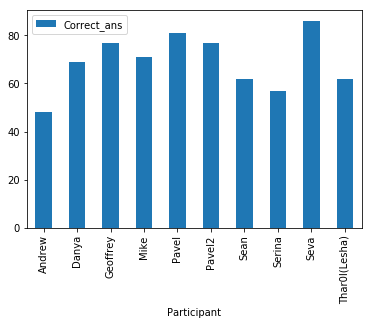

In [311]:
df2 = df
df2.groupby(["Participant"]).agg({'Correct_ans': 'sum'}).plot.bar()

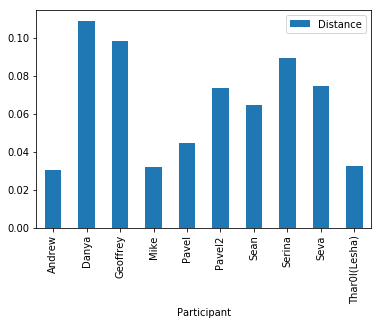

In [312]:
df2 = df.loc[(df['Correct_ans'] > 0) ]
df2.groupby(["Participant"]).agg({'Distance': 'mean'}).plot.bar()

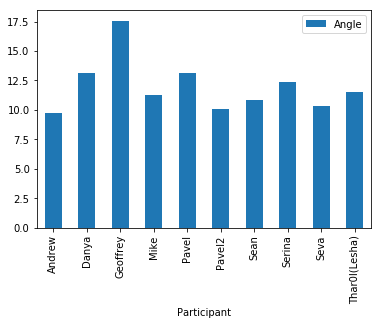

In [313]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Participant"]).agg({'Angle': 'mean'}).plot.bar()

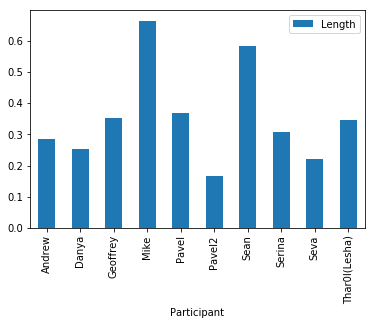

In [314]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Participant"]).agg({'Length': 'mean'}).plot.bar()

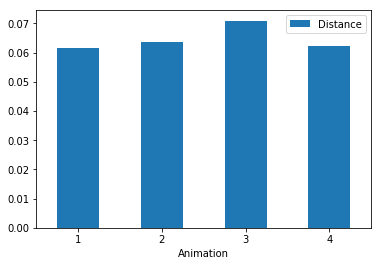

In [315]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

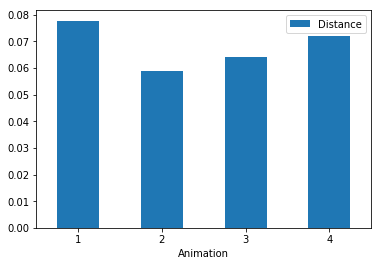

In [316]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

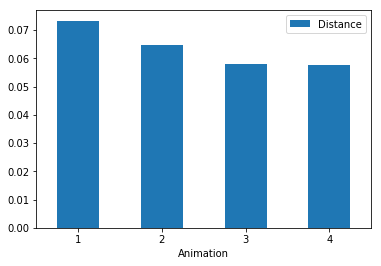

In [317]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

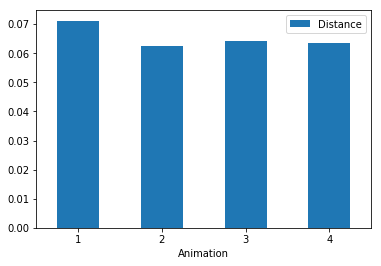

In [318]:
df2 = df.loc[ (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

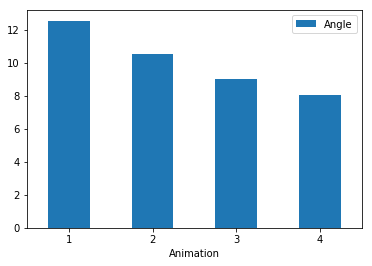

In [319]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

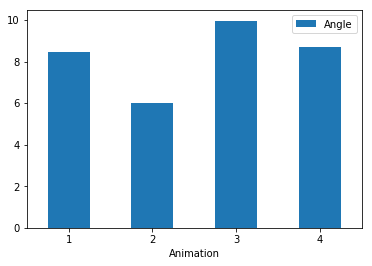

In [320]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

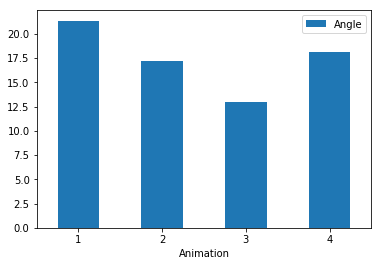

In [321]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

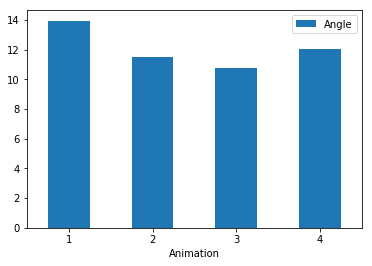

In [322]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

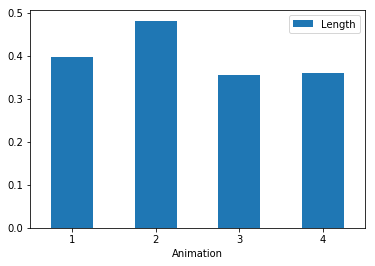

In [323]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Length': 'mean'}).plot.bar(rot=0)

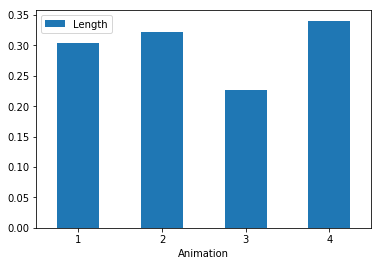

In [324]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Length': 'mean'}).plot.bar(rot=0)

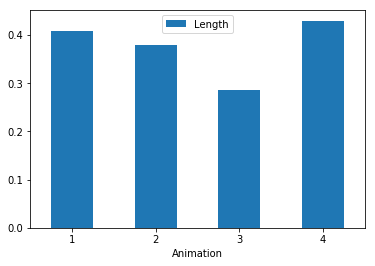

In [325]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Length': 'mean'}).plot.bar(rot=0)

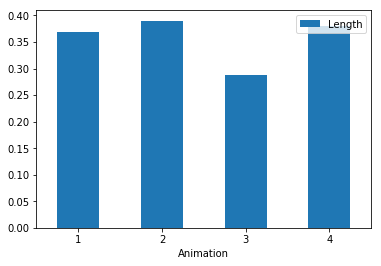

In [326]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Animation"]).agg({'Length': 'mean'}).plot.bar(rot=0)

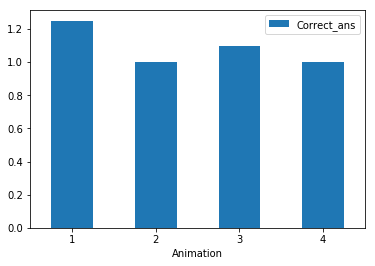

In [327]:
df2 = df.loc[(df['Task'] == 1)]
df2.groupby(["Animation"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0)

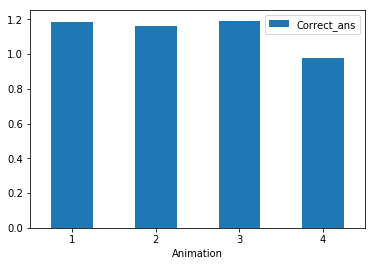

In [328]:
df2 = df.loc[(df['Task'] == 2)]
df2.groupby(["Animation"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0)

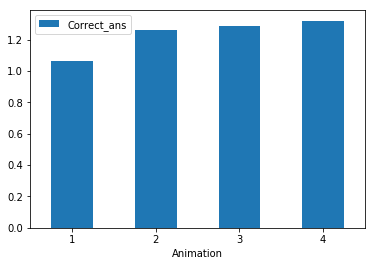

In [329]:
df2 = df.loc[(df['Task'] == 3)]
df2.groupby(["Animation"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0)

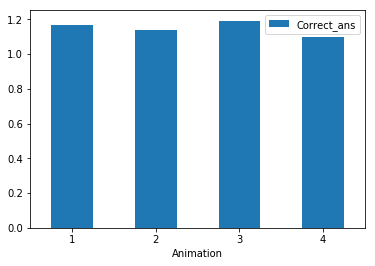

In [330]:
df2 = df
df2.groupby(["Animation"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0)

In [331]:
def correct_ratio(df_sub):
    return df_sub['Correct_ans'].sum() / float(df_sub['Total_correct'].sum())

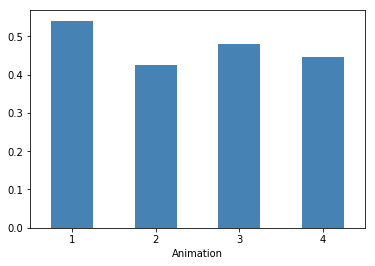

In [332]:
df2 = df.loc[(df['Task'] == 1)]
df2.groupby(["Animation"]).apply(correct_ratio).plot.bar(rot=0,color='steelblue')

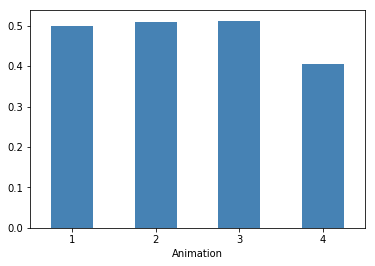

In [333]:
df2 = df.loc[(df['Task'] == 2)]
df2.groupby(["Animation"]).apply(correct_ratio).plot.bar(rot=0,color='steelblue')

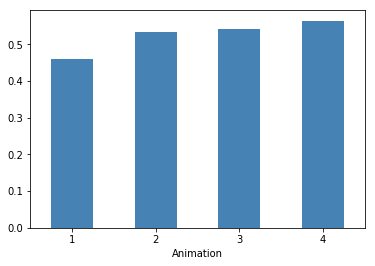

In [334]:
df2 = df.loc[(df['Task'] == 3)]
df2.groupby(["Animation"]).apply(correct_ratio).plot.bar(rot=0,color='steelblue')

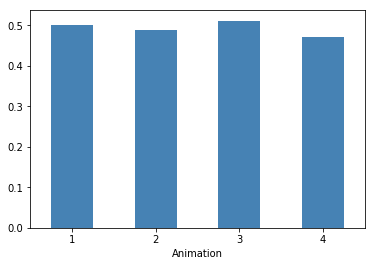

In [335]:
df2 = df
df2.groupby(["Animation"]).apply(correct_ratio).plot.bar(rot=0,color='steelblue')

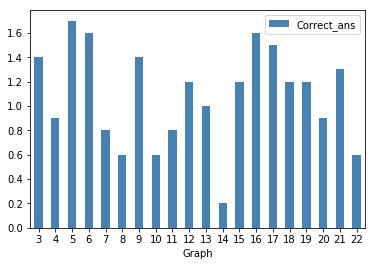

In [336]:
df2 = df.loc[(df['Task'] == 1)]
df2.groupby(["Graph"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0,color='steelblue')

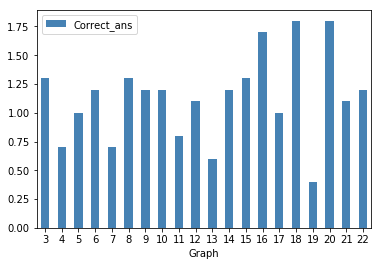

In [337]:
df2 = df.loc[(df['Task'] == 2)]
df2.groupby(["Graph"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0,color='steelblue')

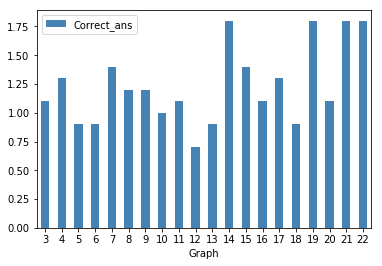

In [338]:
df2 = df.loc[(df['Task'] == 3)]
df2.groupby(["Graph"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0,color='steelblue')

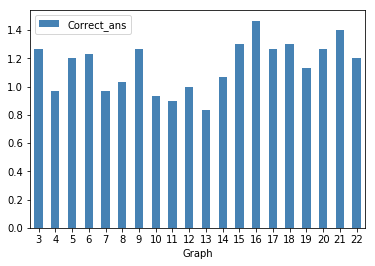

In [339]:
df2 = df
df2.groupby(["Graph"]).agg({'Correct_ans': 'mean'}).plot.bar(rot=0,color='steelblue')

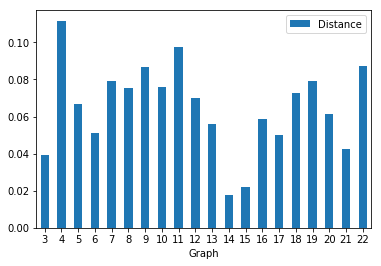

In [340]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

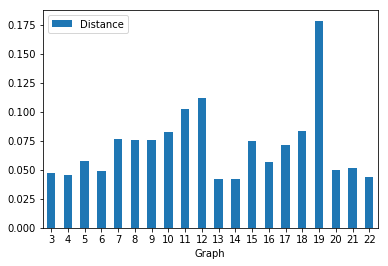

In [341]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

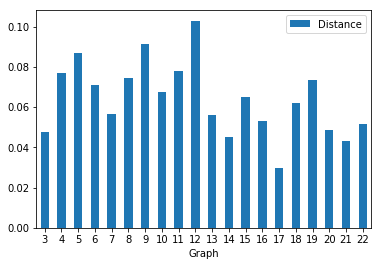

In [342]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

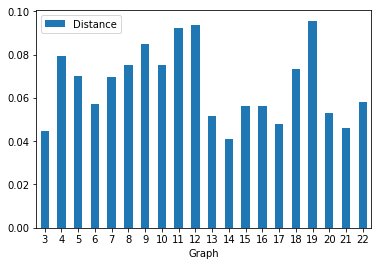

In [343]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Distance': 'mean'}).plot.bar(rot=0)

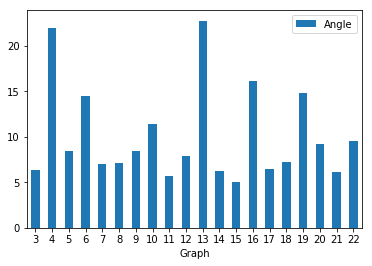

In [344]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

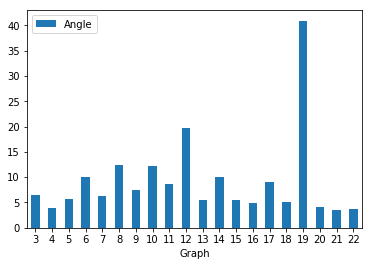

In [345]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

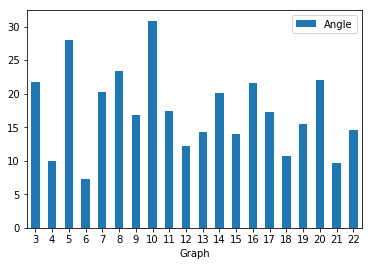

In [346]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

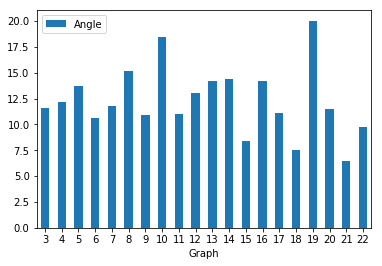

In [347]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Angle': 'mean'}).plot.bar(rot=0)

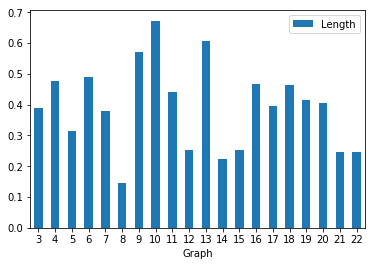

In [348]:
df2 = df.loc[(df['Task'] == 1) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Length': 'mean'}).plot.bar(rot=0)

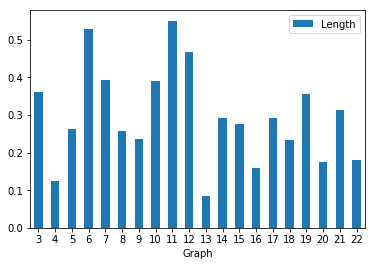

In [349]:
df2 = df.loc[(df['Task'] == 2) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Length': 'mean'}).plot.bar(rot=0)

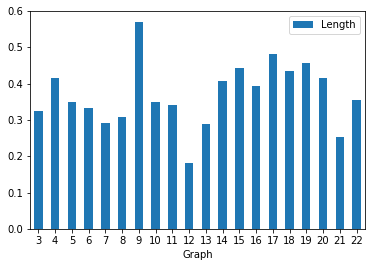

In [350]:
df2 = df.loc[(df['Task'] == 3) & (df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Length': 'mean'}).plot.bar(rot=0)

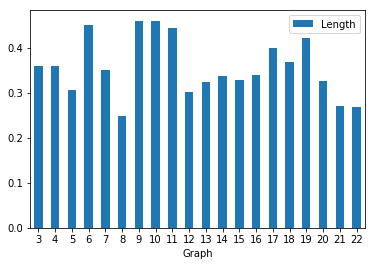

In [351]:
df2 = df.loc[(df['Correct_ans'] > 0)]
df2.groupby(["Graph"]).agg({'Length': 'mean'}).plot.bar(rot=0)

In [352]:
df

,Participant,Graph,Task,Animation,Correct_ans,Total_ans,Total_correct,Distance,Angle,Length
0,Serina,3,1,1,0,0,2,0.611491,1.000000,1.000000
1,Serina,3,2,1,1,1,3,0.081983,2.771163,0.407677
2,Serina,3,3,1,2,2,2,0.048499,18.570245,0.101356
3,Serina,4,1,2,0,0,2,0.431568,1.000000,1.000000
4,Serina,4,2,2,0,0,2,0.431568,1.000000,1.000000
5,Serina,4,3,2,2,2,3,0.117296,6.625672,0.415561
6,Serina,5,1,4,1,1,3,0.031916,3.543278,0.213800
7,Serina,5,2,4,1,1,2,0.083409,0.879968,0.300571
8,Serina,5,3,4,1,1,2,0.073325,60.752338,0.420609
9,Serina,6,1,4,1,1,3,0.037899,7.988787,0.246473


In [353]:
len(df.loc[(df['Total_correct'] == 1)])

100

In [354]:
len(df.loc[(df['Correct_ans'] == 0)])

109

In [355]:
len(df.loc[(df['Distance'] > 0.2)])

109